In [36]:
# !pip install git+ssh://git@github.com/seroetr/preprocess_seroetr.git #download necessary packages


In [35]:
# !pip install -U spacy #download necessary packages
# !python -m spacy download en_core_web_lg #download necessary packages

In [3]:
import pandas as pd
import numpy as np
import spacy

In [4]:
import preprocess_seroetr as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#### Data preprocess

In [5]:
df=pd.read_csv("imdb_reviews.txt",sep="\t",header=None)
df.columns=["reviews","sentiment"]

In [6]:
df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
def clean_data(x):
    x = str(x).lower()
    x = ps.get_cont_to_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_urls(x)
    x = ps.remove_special_chars(x)
    x = ps.remove_accented_chars(x)
    return x

In [8]:
x="that's a really scary movie!"

In [9]:
print(x)
clean_data(x)

that's a really scary movie!


'that is a really scary movie'

In [10]:
df["reviews"]=df["reviews"].apply(lambda x: clean_data(x))

c:\users\developer\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [11]:
df.head()

,reviews,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat characters...,0
2,attempting artiness with black white and cleve...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


In [12]:
nlp=spacy.load("en_core_web_lg")

In [13]:
def get_vec(x):
    doc=nlp(x)
    vec=doc.vector
    return vec

In [14]:
get_vec("how are you").shape

(300,)

In [15]:
df["vec"]=df["reviews"].apply(lambda x: get_vec(x))

In [16]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movie abou...,0,"[-1.7658583, 1.6712562, -2.762896, -1.448437, ..."
1,not sure who was more lost the flat characters...,0,"[-3.794328, 0.70210844, -2.5325108, 0.14926393..."
2,attempting artiness with black white and cleve...,0,"[-2.9543035, -0.07106956, -2.2745807, -0.66580..."
3,very little music or anything to speak of,0,"[-1.9868913, 2.2468886, -4.532146, -2.550426, ..."
4,the best scene in the movie was when gerardo i...,1,"[-1.0748299, 2.742419, -2.5380828, -1.3163186,..."


In [17]:
y=df["sentiment"]

In [18]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [19]:
df.shape, X.shape

((748, 3), (748, 1))

In [20]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [21]:
df.shape, X.shape

((748, 3), (748, 300))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [23]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

In [24]:
np.min(X_train)

-11.106075

#### Feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()

In [27]:
X_train=scaler.fit_transform(X_train) # fitting values between 0-1
X_test=scaler.transform(X_test)

In [28]:
np.min(X_train), np.max(X_train)

(0.0, 1.0000001)

In [29]:
X.shape[1]

300

#### Artificial Neural Network

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [31]:
model=Sequential()
model.add(Dense(128,activation="relu",input_dim=X.shape[1])) # input layer
model.add(Dense(128,activation="relu")) # hidden layer
model.add(Dense(128,activation="relu")) # hidden layer
model.add(Dense(1,activation="sigmoid")) # output layer

In [32]:
model.compile(optimizer=Adam(lr=0.00005),loss="binary_crossentropy",metrics=["accuracy"])

c:\users\developer\appdata\local\programs\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model.fit(X_train, y_train, batch_size=8, epochs=200)

Epoch 1/200
75/75 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5184
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6104
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6371
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6388
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6572
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6839
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6689
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6957
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6856
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7090
Epoch 11/

75/75 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8679
Epoch 84/200
75/75 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 0.8629
Epoch 85/200
75/75 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8729
Epoch 86/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8796
Epoch 87/200
75/75 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8629
Epoch 88/200
75/75 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8746
Epoch 89/200
75/75 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8813
Epoch 90/200
75/75 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8712
Epoch 91/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8863
Epoch 92/200
75/75 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.8679
Epoch 93/200


75/75 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9381
Epoch 165/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1661 - accuracy: 0.9381
Epoch 166/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9415
Epoch 167/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9498
Epoch 168/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9331
Epoch 169/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9348
Epoch 170/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9314
Epoch 171/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9465
Epoch 172/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9365
Epoch 173/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9515
Epoc

In [37]:
# !pip install mlxtend #download necessary packages

In [58]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [59]:
print(y_pred)

[[9.99881089e-01]
 [7.47601851e-04]
 [9.43031549e-01]
 [7.17046142e-01]
 [9.89502847e-01]
 [1.24498144e-01]
 [9.97476220e-01]
 [6.93802722e-03]
 [3.50425005e-01]
 [9.99605954e-01]
 [1.19113281e-01]
 [9.66794431e-01]
 [9.99765873e-01]
 [9.67118740e-01]
 [9.99769926e-01]
 [2.35984474e-03]
 [3.82380784e-02]
 [7.65854895e-01]
 [3.82924937e-02]
 [1.45210661e-02]
 [8.14138174e-01]
 [5.60116780e-04]
 [9.28311348e-01]
 [4.35784161e-01]
 [9.97812271e-01]
 [9.95750368e-01]
 [9.89824653e-01]
 [1.38073519e-01]
 [5.53647578e-01]
 [8.04929912e-01]
 [2.09315084e-02]
 [7.51349688e-01]
 [8.99084210e-01]
 [5.29846177e-02]
 [2.19898954e-01]
 [9.98760223e-01]
 [9.95595276e-01]
 [1.60047293e-01]
 [7.84335971e-01]
 [9.98820186e-01]
 [5.59226833e-02]
 [9.89912570e-01]
 [7.50278711e-01]
 [9.81381893e-01]
 [8.99536163e-02]
 [9.96913493e-01]
 [2.37079769e-01]
 [1.21524499e-04]
 [3.54501158e-02]
 [9.66344059e-01]
 [2.18908325e-01]
 [7.24623740e-01]
 [3.95712376e-01]
 [8.29443634e-01]
 [3.37158702e-03]
 [9.676994

In [51]:
y_pred=np.where(y_pred > 0.6, 1,0)

In [52]:
print(confusion_matrix(y_test,y_pred))

[[55 18]
 [19 58]]


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

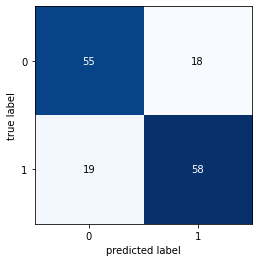

In [54]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        73
           1       0.76      0.75      0.76        77

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



#### Define different thresholds

In [56]:
from sklearn.metrics import precision_score, recall_score

In [60]:
y_pred=model.predict(X_test)
for i in [0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75]:
  classes = [1 if val>i else 0 for val in y_pred]
  print(i, "-->>", precision_score(y_test, classes), recall_score(y_test, classes))

5/5 [==============================] - 0s 2ms/step
0.3 -->> 0.7471264367816092 0.8441558441558441
0.35 -->> 0.7529411764705882 0.8311688311688312
0.4 -->> 0.7560975609756098 0.8051948051948052
0.45 -->> 0.7468354430379747 0.7662337662337663
0.5 -->> 0.7532467532467533 0.7532467532467533
0.55 -->> 0.7532467532467533 0.7532467532467533
0.6 -->> 0.7631578947368421 0.7532467532467533
0.65 -->> 0.7464788732394366 0.6883116883116883
0.7 -->> 0.7464788732394366 0.6883116883116883
0.75 -->> 0.78125 0.6493506493506493


In [61]:
classes = [1 if val>0.55 else 0 for val in y_pred]

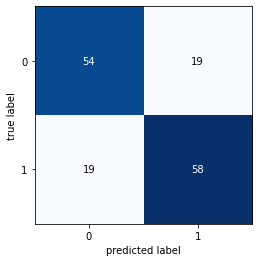

In [62]:
plot_confusion_matrix(confusion_matrix(y_test, classes))
plt.show()

#### 1D CNN model

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout, SpatialDropout1D

In [64]:
X_train.shape

(598, 300)

In [65]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1) # ow it's 2D, first one is batch size 
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1) # now it's 2D, first one is batch size
X_train.shape, X_test.shape

((598, 300, 1), (150, 300, 1))

In [66]:
X_train[0].shape

(300, 1)

In [69]:
model=Sequential()
model.add(Conv1D(32,2,activation="relu",input_shape=X_train[0].shape))
model.add(BatchNormalization()) # set data between 0-1
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 299, 32)           96        
                                                                 
 batch_normalization_1 (Batc  (None, 299, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 299, 32)           0         
                                                                 
 flatten_1 (Flatten)         (None, 9568)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                612416    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [72]:
epochs=100
model.compile(optimizer=Adam(learning_rate=0.00001),loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/100
19/19 [==============================] - 2s 59ms/step - loss: 0.7558 - accuracy: 0.5084 - val_loss: 0.6931 - val_accuracy: 0.4933
Epoch 2/100
19/19 [==============================] - 1s 33ms/step - loss: 0.6894 - accuracy: 0.5870 - val_loss: 0.6916 - val_accuracy: 0.5067
Epoch 3/100
19/19 [==============================] - 1s 32ms/step - loss: 0.6804 - accuracy: 0.5936 - val_loss: 0.6900 - val_accuracy: 0.5600
Epoch 4/100
19/19 [==============================] - 1s 42ms/step - loss: 0.6542 - accuracy: 0.6271 - val_loss: 0.6885 - val_accuracy: 0.6133
Epoch 5/100
19/19 [==============================] - 1s 31ms/step - loss: 0.6318 - accuracy: 0.6355 - val_loss: 0.6868 - val_accuracy: 0.6467
Epoch 6/100
19/19 [==============================] - 1s 28ms/step - loss: 0.6234 - accuracy: 0.6555 - val_loss: 0.6851 - val_accuracy: 0.6133
Epoch 7/100
19/19 [==============================] - 1s 38ms/step - loss: 0.6008 - accuracy: 0.6823 - val_loss: 0.6830 - val_accuracy: 0.6400
Epoch 

19/19 [==============================] - 0s 26ms/step - loss: 0.3562 - accuracy: 0.8528 - val_loss: 0.5338 - val_accuracy: 0.7067
Epoch 59/100
19/19 [==============================] - 0s 25ms/step - loss: 0.3529 - accuracy: 0.8462 - val_loss: 0.5325 - val_accuracy: 0.7133
Epoch 60/100
19/19 [==============================] - 1s 32ms/step - loss: 0.3428 - accuracy: 0.8512 - val_loss: 0.5319 - val_accuracy: 0.7133
Epoch 61/100
19/19 [==============================] - 1s 36ms/step - loss: 0.3270 - accuracy: 0.8629 - val_loss: 0.5319 - val_accuracy: 0.7000
Epoch 62/100
19/19 [==============================] - 1s 53ms/step - loss: 0.3136 - accuracy: 0.8746 - val_loss: 0.5335 - val_accuracy: 0.7200
Epoch 63/100
19/19 [==============================] - 1s 58ms/step - loss: 0.3447 - accuracy: 0.8645 - val_loss: 0.5322 - val_accuracy: 0.7200
Epoch 64/100
19/19 [==============================] - 1s 52ms/step - loss: 0.3331 - accuracy: 0.8662 - val_loss: 0.5321 - val_accuracy: 0.7200
Epoch 65/100

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [77]:
def plot_history(history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

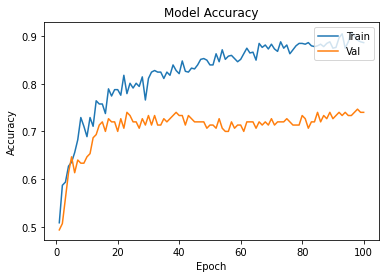

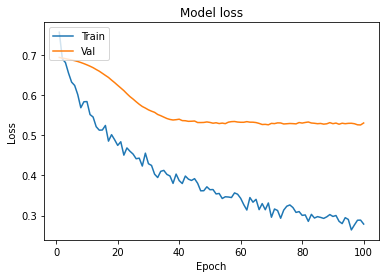

In [78]:
plot_history(history,epochs)
# we have low data less than one thousand

#### Save, load, store, and test

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model.save("cnn_example_model",save_format="h5")

In [81]:
loading_model=load_model("cnn_example_model")

In [82]:
x="It's a great movie. I'd like to watch it again"

In [83]:
x_clean=clean_data(x)
x_clean

'it is a great movie i would like to watch it again'

In [84]:
vec=get_vec(x_clean).reshape(1,-1)
vec.shape

(1, 300)

In [85]:
vec=scaler.transform(vec)
vec.shape

(1, 300)

In [86]:
vec=vec.reshape(1,300,1)
vec.shape

(1, 300, 1)

In [87]:
y_pred=loading_model.predict(vec)

1/1 [==============================] - 0s 92ms/step


In [88]:
y_pred=np.where(y_pred > 0.6, 1,0)

In [90]:
print(y_pred)

[[1]]
